## Installations required for project:

### pip install snowflake-connector-python
### pip install pandas-profiling
### pip install snowflake-sqlalchemy
### pip install "snowflake-connector-python[pandas]"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import getpass
import seaborn as sns
%matplotlib inline
import snowflake.connector


In [2]:
conn = snowflake.connector.connect(
    user = 'GAURAVMISHRAGM14',
    password = getpass.getpass("Your Snowflake password: \n"),
    account = 'ITBLSIZ-DM68127',
    warehouse = 'GAURAV',
    database = 'RETAIL_PROJECT',
    schema = 'PUBLIC'
)


In [3]:
cur = conn.cursor()

In [4]:
sel_campaign_desc = " select * from CAMPAIGN_DESC_RAW ;"
sel_campaign = " select * from CAMPAIGN_RAW ;"
sel_coupon = " select * from COUPON_RAW ;"
sel_coupon_redempt = " select * from COUPON_REDEMPT_RAW ;"
sel_demographic = " select * from HH_DEMOGRAPHIC_RAW ;"
sel_product = " select * from PRODUCT_RAW ;"
sel_transactions = " select * from TRANSACTIONS_RAW ;"

In [5]:
cur.execute(sel_campaign_desc)
CAMPAIGN_DESC_RAW = cur.fetch_pandas_all()

In [6]:
cur.execute(sel_campaign)
CAMPAIGN_RAW = cur.fetch_pandas_all()

In [7]:
cur.execute(sel_coupon)
COUPON_RAW = cur.fetch_pandas_all()

In [8]:
cur.execute(sel_coupon_redempt)
COUPON_REDEMPT_RAW = cur.fetch_pandas_all()

In [9]:
cur.execute(sel_demographic)
HH_DEMOGRAPHIC_RAW = cur.fetch_pandas_all()

In [10]:
cur.execute(sel_product)
PRODUCT_RAW = cur.fetch_pandas_all()

In [11]:
cur.execute(sel_transactions)
TRANSACTIONS_RAW = cur.fetch_pandas_all()

In [12]:
cur.close()
conn.close()

In [13]:
CAMPAIGN_DESC_RAW.shape ##checking the size of data for each table

(30, 4)

In [14]:
TRANSACTIONS_RAW.shape

(450416, 12)

In [15]:
PRODUCT_RAW.shape

(92353, 7)

In [16]:
HH_DEMOGRAPHIC_RAW.shape

(2500, 8)

In [17]:
COUPON_REDEMPT_RAW.shape

(2318, 4)

In [18]:
COUPON_RAW.shape

(124548, 3)

In [19]:
CAMPAIGN_RAW.shape

(7208, 3)

In [20]:
HH_DEMOGRAPHIC_RAW.isnull().sum()  ##checking for any null values is available in the table or not. Same we will repeat for every table

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
HOUSEHOLD_KEY          0
dtype: int64

In [21]:
CAMPAIGN_DESC_RAW.isnull().sum()

DESCRIPTION    0
CAMPAIGN       0
START_DAY      0
END_DAY        0
dtype: int64

In [22]:
CAMPAIGN_RAW.isnull().sum()

DESCRIPTION      0
HOUSEHOLD_KEY    0
CAMPAIGN         0
dtype: int64

In [23]:
COUPON_RAW.isnull().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [24]:
COUPON_REDEMPT_RAW.isnull().sum()

HOUSEHOLD_KEY    0
DAY              0
COUPON_UPC       0
CAMPAIGN         0
dtype: int64

In [25]:
PRODUCT_RAW.isnull().sum()

PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [26]:
TRANSACTIONS_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [27]:
TRANSACTIONS_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0


In [28]:
TRANSACTIONS_RAW.describe()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,450416.00000,4.504160e+05,450416.000000,4.504160e+05,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000
mean,1259.55822,2.840143e+10,112.470718,2.209464e+06,86.522561,3.018436,2586.661648,-0.552774,1583.582364,16.754487,-0.014860,-0.001920
std,728.10869,5.792110e+08,42.064258,2.726512e+06,1058.788785,3.860427,7996.435988,1.186736,415.130098,6.018864,0.195378,0.044335
min,1.00000,2.698485e+10,1.000000,2.567100e+04,0.000000,0.000000,1.000000,-75.000000,0.000000,1.000000,-17.000000,-3.000000
25%,641.00000,2.798531e+10,84.000000,9.118780e+05,1.000000,1.250000,330.000000,-0.740000,1317.000000,13.000000,0.000000,0.000000
50%,1234.00000,2.839168e+10,117.000000,1.016800e+06,1.000000,2.000000,369.000000,-0.090000,1630.000000,17.000000,0.000000,0.000000
75%,1914.00000,2.886773e+10,147.000000,1.115360e+06,1.000000,3.390000,421.000000,0.000000,1906.000000,22.000000,0.000000,0.000000
max,2500.00000,2.933965e+10,176.000000,1.260019e+07,51912.000000,400.000000,32124.000000,0.000000,2359.000000,26.000000,0.000000,0.000000


In [29]:
##here in the transactions data the date is not available in proper format, so now we will deal with that

In [30]:
 from datetime import datetime , timedelta

In [31]:
start_date = pd.to_datetime('2020-01-01') ##this should be asked from the client in order to transform the data

In [32]:
start_date

Timestamp('2020-01-01 00:00:00')

In [33]:
TRANSACTIONS_RAW['DATE'] = start_date + pd.to_timedelta(TRANSACTIONS_RAW['DAY'],unit= 'D')

In [34]:
TRANSACTIONS_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02


In [35]:
CAMPAIGN_DESC_RAW.head(6)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684
5,TypeB,21,624,656


In [36]:
CAMPAIGN_DESC_RAW['START_DATE'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['START_DAY'],'D')
CAMPAIGN_DESC_RAW['END_DATE'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['END_DAY'],'D')
CAMPAIGN_DESC_RAW['CAMPAIGN_DURATION'] = CAMPAIGN_DESC_RAW['END_DAY'] - CAMPAIGN_DESC_RAW['START_DAY']

In [37]:
CAMPAIGN_DESC_RAW[['START_DATE','END_DATE','CAMPAIGN_DURATION']].head()

,START_DATE,END_DATE,CAMPAIGN_DURATION
0,2021-10-21,2021-12-20,60
1,2021-07-01,2021-12-09,161
2,2021-10-21,2021-11-22,32
3,2021-09-07,2021-11-16,70
4,2021-10-08,2021-11-15,38


In [38]:
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [39]:
COUPON_REDEMPT_RAW['DATE'] = start_date + pd.to_timedelta(COUPON_REDEMPT_RAW['DAY'],'D')

In [40]:
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,DATE
0,1,421,10000085364,8,2021-02-25
1,1,421,51700010076,8,2021-02-25
2,1,427,54200000033,8,2021-03-03
3,1,597,10000085476,18,2021-08-20
4,1,597,54200029176,18,2021-08-20


In [41]:
TRANSACTIONS_RAW['DATE'].max() ##This will give date of last transaction

Timestamp('2020-06-25 00:00:00')

In [42]:
CAMPAIGN_DESC_RAW['START_DATE'].max() ##Date on which last campaign was launched

Timestamp('2021-10-21 00:00:00')

In [43]:
COUPON_REDEMPT_RAW['DATE'].max() ##last coupon redemption date

Timestamp('2021-12-05 00:00:00')

In [44]:
CAMPAIGN_DESC_RAW['CAMPAIGN_DURATION'].mean() ## avg. duration of campaigns

46.6

In [45]:
HH_DEMOGRAPHIC_RAW.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [46]:
HH_DEMOGRAPHIC_RAW['AGE_DESC'].value_counts()

AGE_DESC
45-54    901
35-44    594
25-34    445
65+      230
55-64    187
19-24    143
Name: count, dtype: int64

In [47]:
HH_DEMOGRAPHIC_RAW['HOUSEHOLD_SIZE_DESC'].value_counts() ## This shows that most of the households have only 2 members in family

HOUSEHOLD_SIZE_DESC
2     1004
1      783
3      338
5+     206
4      169
Name: count, dtype: int64

In [48]:
CAMPAIGN_DESC_RAW.head()


,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_DATE,END_DATE,CAMPAIGN_DURATION
0,TypeB,24,659,719,2021-10-21,2021-12-20,60
1,TypeC,15,547,708,2021-07-01,2021-12-09,161
2,TypeB,25,659,691,2021-10-21,2021-11-22,32
3,TypeC,20,615,685,2021-09-07,2021-11-16,70
4,TypeB,23,646,684,2021-10-08,2021-11-15,38


<Axes: xlabel='CAMPAIGN'>

<Figure size 1500x500 with 0 Axes>

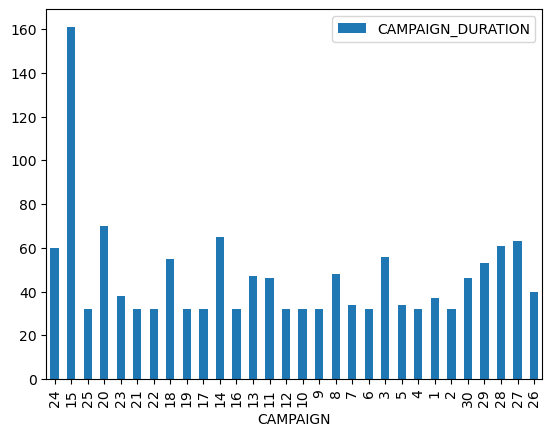

In [49]:
plt.figure(figsize = (15,5))
CAMPAIGN_DESC_RAW.plot(x = 'CAMPAIGN' , y = 'CAMPAIGN_DURATION' , kind = 'bar')

#### From the above graph we can deduce that the campaign 15 ran for more than 160 days other than that all others are close to the avg.

In [50]:
CAMPAIGN_DESC_RAW.groupby('DESCRIPTION').aggregate({'CAMPAIGN':'count','CAMPAIGN_DURATION':'mean'})

,CAMPAIGN,CAMPAIGN_DURATION
DESCRIPTION,,
TypeA,5,47.200000
TypeB,19,37.631579
TypeC,6,74.500000


##### There have been 19 type-B campaigns with avg. duration of 38 days. In comparison, there have been 6 type-A campaigns with avg duration of  75 days.

In [51]:
CAMPAIGN_DESC_RAW['START_MONTH'] = CAMPAIGN_DESC_RAW['START_DATE'].dt.month
CAMPAIGN_DESC_RAW['END_MONTH'] = CAMPAIGN_DESC_RAW['END_DATE'].dt.month

In [52]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_DATE,END_DATE,CAMPAIGN_DURATION,START_MONTH,END_MONTH
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,12
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,7,12
2,TypeB,25,659,691,2021-10-21,2021-11-22,32,10,11
3,TypeC,20,615,685,2021-09-07,2021-11-16,70,9,11
4,TypeB,23,646,684,2021-10-08,2021-11-15,38,10,11


In [53]:
CAMPAIGN_RAW.shape

(7208, 3)

In [54]:
CAMPAIGN_RAW['HOUSEHOLD_KEY'].nunique()

1584

In [55]:
TRANSACTIONS_RAW['HOUSEHOLD_KEY'].nunique()

2494

#### There are in total 1584 unique households which participated in the campaigns, this leaves us with the otcome that out of 2500 total households, there are  916 households who never participated in campaigns.

In [56]:
CAMPAIGN_RAW.dtypes

DESCRIPTION      object
HOUSEHOLD_KEY     int16
CAMPAIGN           int8
dtype: object

In [57]:
CAMPAIGN_RAW.groupby('HOUSEHOLD_KEY')['CAMPAIGN'].count()

HOUSEHOLD_KEY
1       8
2       1
3       3
4       1
6       4
       ..
2496    5
2497    3
2498    6
2499    2
2500    8
Name: CAMPAIGN, Length: 1584, dtype: int64

(Text(0, 0.5, 'Number of household reached to'),)

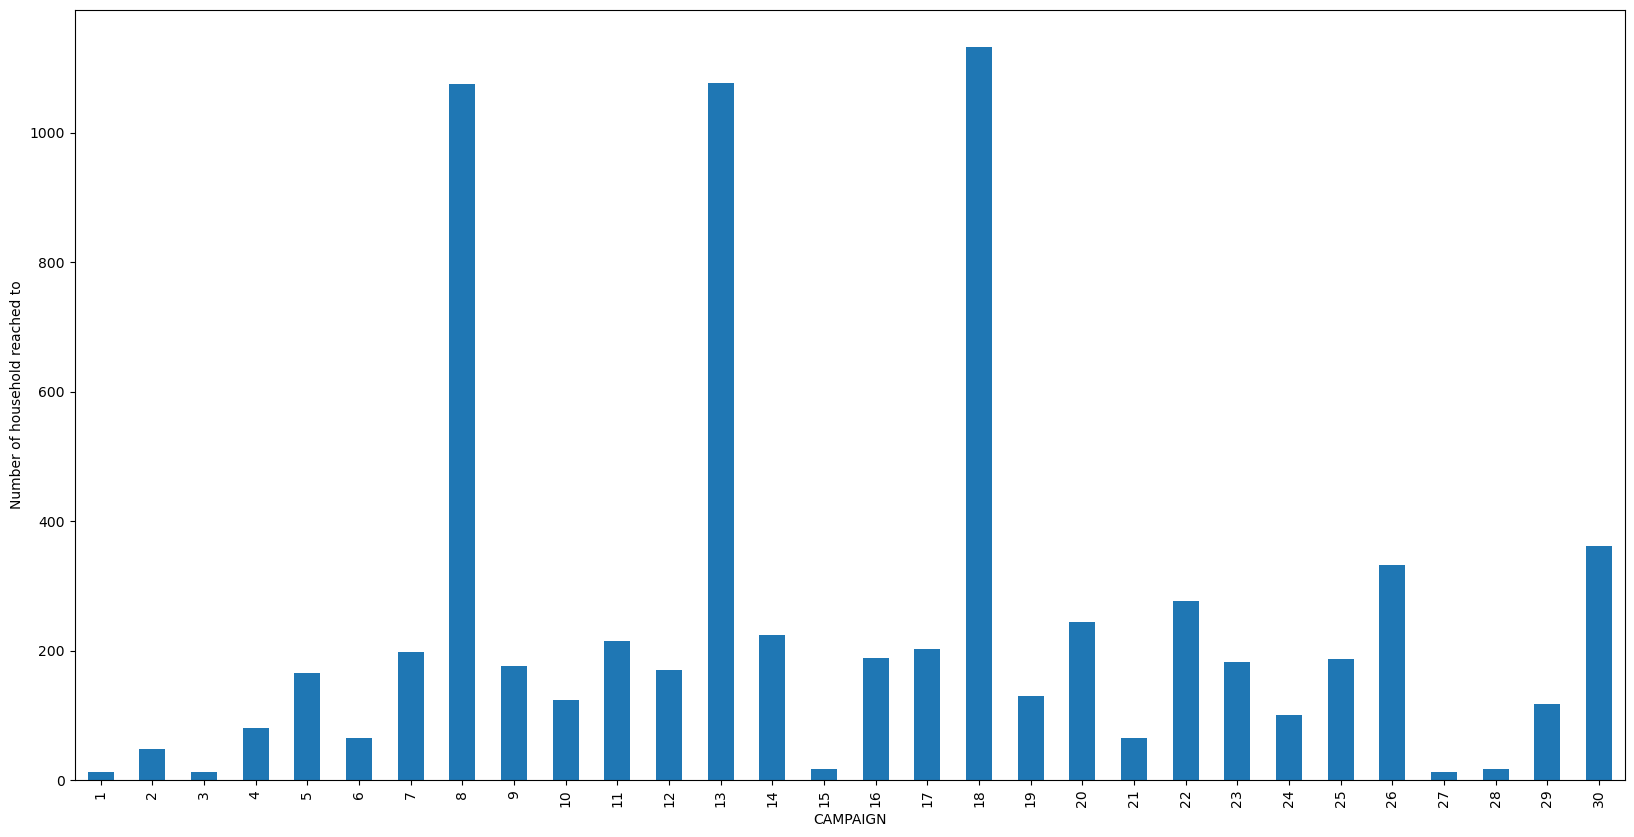

In [58]:
plt.figure(figsize=(20,10))
CAMPAIGN_RAW.groupby('CAMPAIGN')['HOUSEHOLD_KEY'].count().plot.bar() ,
plt.ylabel('Number of household reached to') ,

#### In campaign 18 most number of households participated

In [59]:
COUPON_RAW.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [60]:
COUPON_RAW['COUPON_UPC'].nunique()  ##Total number of unique coupons created

1135

In [61]:
Coupon_given = COUPON_RAW.groupby('CAMPAIGN').aggregate(Total_products =('PRODUCT_ID','nunique') , Total_coupons_given = ('COUPON_UPC' , 'nunique') )

In [62]:
Coupon_given.sort_values(by = 'Total_products' , ascending=False).head()

,Total_products,Total_coupons_given
CAMPAIGN,,
13,35616,207
18,35513,209
8,17178,209
26,3396,181
30,3205,181


In [63]:
Coupon_given = Coupon_given.merge(right=CAMPAIGN_DESC_RAW , on='CAMPAIGN' ,how = 'left')

In [64]:
Coupon_given

,CAMPAIGN,Total_products,Total_coupons_given,DESCRIPTION,START_DAY,END_DAY,START_DATE,END_DATE,CAMPAIGN_DURATION,START_MONTH,END_MONTH
0,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,1
1,2,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,1
2,3,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,2
3,4,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,1,2
4,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,1,2
5,6,18,1,TypeC,393,425,2021-01-28,2021-03-01,32,1,3
6,7,259,8,TypeB,398,432,2021-02-02,2021-03-08,34,2,3
7,8,17178,209,TypeA,412,460,2021-02-16,2021-04-05,48,2,4
8,9,825,18,TypeB,435,467,2021-03-11,2021-04-12,32,3,4
9,10,393,14,TypeB,463,495,2021-04-08,2021-05-10,32,4,5


In [65]:
Coupon_given.columns



Index(['CAMPAIGN', 'Total_products', 'Total_coupons_given', 'DESCRIPTION',
       'START_DAY', 'END_DAY', 'START_DATE', 'END_DATE', 'CAMPAIGN_DURATION',
       'START_MONTH', 'END_MONTH'],
      dtype='object')

In [66]:
CAMPAIGN_DESC_RAW.columns

Index(['DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY', 'START_DATE',
       'END_DATE', 'CAMPAIGN_DURATION', 'START_MONTH', 'END_MONTH'],
      dtype='object')

In [67]:
Coupon_given.loc[:,('CAMPAIGN','Total_products','Total_coupons_given','START_DATE','END_DATE', 'DESCRIPTION')]

,CAMPAIGN,Total_products,Total_coupons_given,START_DATE,END_DATE,DESCRIPTION
0,1,383,11,2020-12-12,2021-01-18,TypeB
1,2,301,16,2020-12-17,2021-01-18,TypeB
2,3,506,34,2020-12-22,2021-02-16,TypeC
3,4,200,12,2021-01-07,2021-02-08,TypeB
4,5,443,11,2021-01-12,2021-02-15,TypeB
5,6,18,1,2021-01-28,2021-03-01,TypeC
6,7,259,8,2021-02-02,2021-03-08,TypeB
7,8,17178,209,2021-02-16,2021-04-05,TypeA
8,9,825,18,2021-03-11,2021-04-12,TypeB
9,10,393,14,2021-04-08,2021-05-10,TypeB


#### Campaign 13 , 18 and 8 are the one with most products in them

In [68]:
COUPON_RAW.columns

Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], dtype='object')

In [69]:
PRODUCT_RAW.columns

Index(['PRODUCT_ID', 'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT'],
      dtype='object')

In [70]:
coupon_product = COUPON_RAW.merge(right=PRODUCT_RAW , on= 'PRODUCT_ID' ,how = 'left')

In [71]:
coupon_product.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
1,10000089064,27754,9,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
2,10000089073,28897,12,69,GROCERY,Private,EGGS,EGGS - X-LARGE,A D 1 DZ
3,51800009050,28919,28,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED COOKIES-CHUB,16.5 OZ
4,52100000076,28929,25,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ


In [72]:
coupon_product['COMMODITY_DESC'].value_counts().sort_values(ascending=False).head(20)

COMMODITY_DESC
HAIR CARE PRODUCTS           6261
MAKEUP AND TREATMENT         5585
FRZN MEAT/MEAT DINNERS       4893
FROZEN PIZZA                 3658
BEEF                         3314
ICE CREAM/MILK/SHERBTS       3257
CHEESE                       3146
YOGURT                       2460
ORAL HYGIENE PRODUCTS        2437
LUNCHMEAT                    2425
FRZN VEGETABLE/VEG DSH       2051
BABY FOODS                   2038
HAND/BODY/FACIAL PRODUCTS    1984
VITAMINS                     1880
REFRGRATD JUICES/DRNKS       1856
SOAP - LIQUID & BAR          1791
PORK                         1783
SEAFOOD - FROZEN             1705
FLUID MILK PRODUCTS          1680
DEODORANTS                   1666
Name: count, dtype: int64

#### Most prominent products amoung coupons are bathroom products such as hair care and makeup.

In [73]:
COUPON_REDEMPT_RAW['COUPON_UPC'].nunique()

556

In [74]:
COUPON_RAW['COUPON_UPC'].nunique()

1135

#### This shows that only 556 coupons were used by customer out of 1135 distributed coupons.

<Axes: xlabel='CAMPAIGN'>

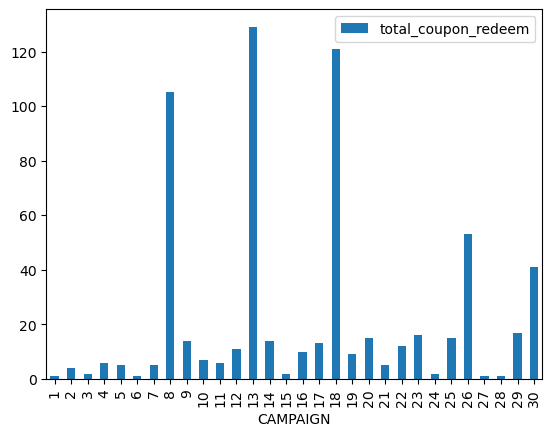

In [75]:
COUPON_REDEMPT_RAW.groupby('CAMPAIGN').aggregate(total_coupon_redeem = ('COUPON_UPC' , 'nunique')).plot.bar()

In [76]:
coupon_redeem = COUPON_REDEMPT_RAW.groupby('CAMPAIGN').aggregate(total_coupon_redeem = ('COUPON_UPC','nunique'))

In [77]:
coupon_redeem.columns

Index(['total_coupon_redeem'], dtype='object')

In [78]:
Coupon_given.columns

Index(['CAMPAIGN', 'Total_products', 'Total_coupons_given', 'DESCRIPTION',
       'START_DAY', 'END_DAY', 'START_DATE', 'END_DATE', 'CAMPAIGN_DURATION',
       'START_MONTH', 'END_MONTH'],
      dtype='object')

In [79]:
coupon_redeem = coupon_redeem.merge(right = Coupon_given , on='CAMPAIGN' , how = 'left')

In [80]:
coupon_redeem.head(10)

,CAMPAIGN,total_coupon_redeem,Total_products,Total_coupons_given,DESCRIPTION,START_DAY,END_DAY,START_DATE,END_DATE,CAMPAIGN_DURATION,START_MONTH,END_MONTH
0,1,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,1
1,2,4,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,1
2,3,2,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,2
3,4,6,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,1,2
4,5,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,1,2
5,6,1,18,1,TypeC,393,425,2021-01-28,2021-03-01,32,1,3
6,7,5,259,8,TypeB,398,432,2021-02-02,2021-03-08,34,2,3
7,8,105,17178,209,TypeA,412,460,2021-02-16,2021-04-05,48,2,4
8,9,14,825,18,TypeB,435,467,2021-03-11,2021-04-12,32,3,4
9,10,7,393,14,TypeB,463,495,2021-04-08,2021-05-10,32,4,5


In [81]:
coupon_redeem['coupon_redeem_rate'] = (coupon_redeem['total_coupon_redeem']/coupon_redeem['Total_coupons_given'])*100

In [82]:
coupon_redeem.head()

,CAMPAIGN,total_coupon_redeem,Total_products,Total_coupons_given,DESCRIPTION,START_DAY,END_DAY,START_DATE,END_DATE,CAMPAIGN_DURATION,START_MONTH,END_MONTH,coupon_redeem_rate
0,1,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,1,9.090909
1,2,4,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,1,25.000000
2,3,2,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,2,5.882353
3,4,6,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,1,2,50.000000
4,5,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,1,2,45.454545


In [83]:
coupon_redeem.loc[:,('CAMPAIGN' , 'Total_coupons_given', 'coupon_redeem_rate')].sort_values('coupon_redeem_rate' , ascending = False)

,CAMPAIGN,Total_coupons_given,coupon_redeem_rate
23,24,2,100.000000
5,6,1,100.000000
14,15,2,100.000000
22,23,18,88.888889
24,25,17,88.235294
18,19,11,81.818182
8,9,18,77.777778
15,16,13,76.923077
11,12,15,73.333333
16,17,19,68.421053


<Axes: xlabel='CAMPAIGN', ylabel='coupon_redeem_rate'>

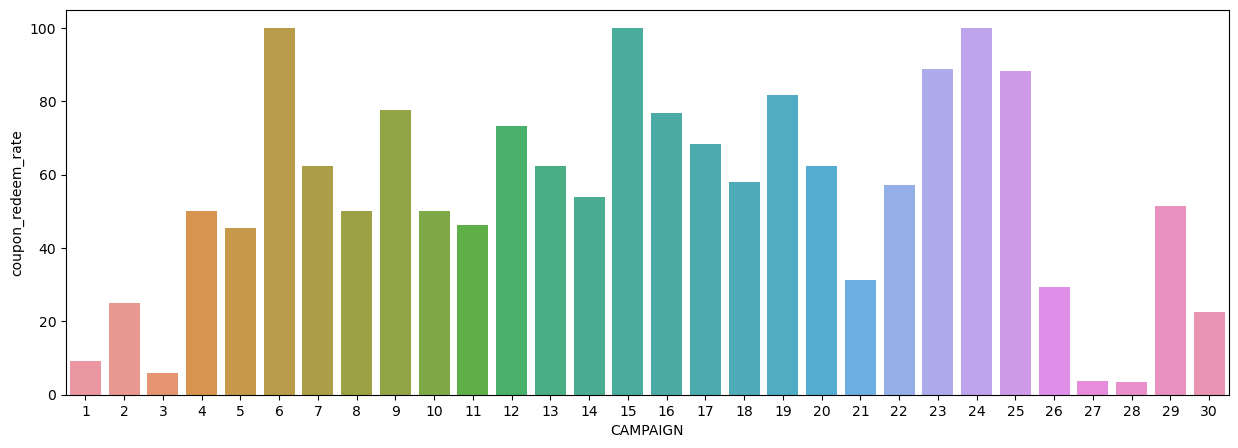

In [84]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN' , y= 'coupon_redeem_rate' , data = coupon_redeem)

In [85]:
TRANSACTIONS_RAW.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'DATE'],
      dtype='object')

In [86]:
TRANSACTIONS_RAW['BASKET_ID'].nunique()

50479

In [87]:
TRANSACTIONS_RAW['BASKET_ID'].count()

450416

In [88]:
tranx_bucket = TRANSACTIONS_RAW.groupby('BASKET_ID').aggregate({'SALES_VALUE': 'sum', 'COUPON_DISC':'sum' ,'COUPON_MATCH_DISC':'sum' })

In [89]:
tranx_bucket.head(10)

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC
BASKET_ID,,,
26984851472,5.91,0,0
26984851516,12.43,0,0
26984896261,11.37,0,0
26984905972,2.55,0,0
26984945254,3.53,0,0
26984951769,5.79,0,0
26985025264,44.78,0,0
26985040735,139.22,0,0
26985052379,0.99,0,0


In [90]:
tranx_bucket['use_coupon'] = tranx_bucket['COUPON_DISC']!= 0 

In [91]:
tranx_bucket.head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,use_coupon
BASKET_ID,,,,
26984851472,5.91,0,0,False
26984851516,12.43,0,0,False
26984896261,11.37,0,0,False
26984905972,2.55,0,0,False
26984945254,3.53,0,0,False


In [92]:
tranx_bucket['use_coupon'].value_counts()

use_coupon
False    47892
True      2587
Name: count, dtype: int64

In [93]:
round(tranx_bucket['SALES_VALUE'].mean() , 2)

26.93

#### Avg. basket value is $26.93

Text(0.5, 1.0, 'Basket Value Boxplot')

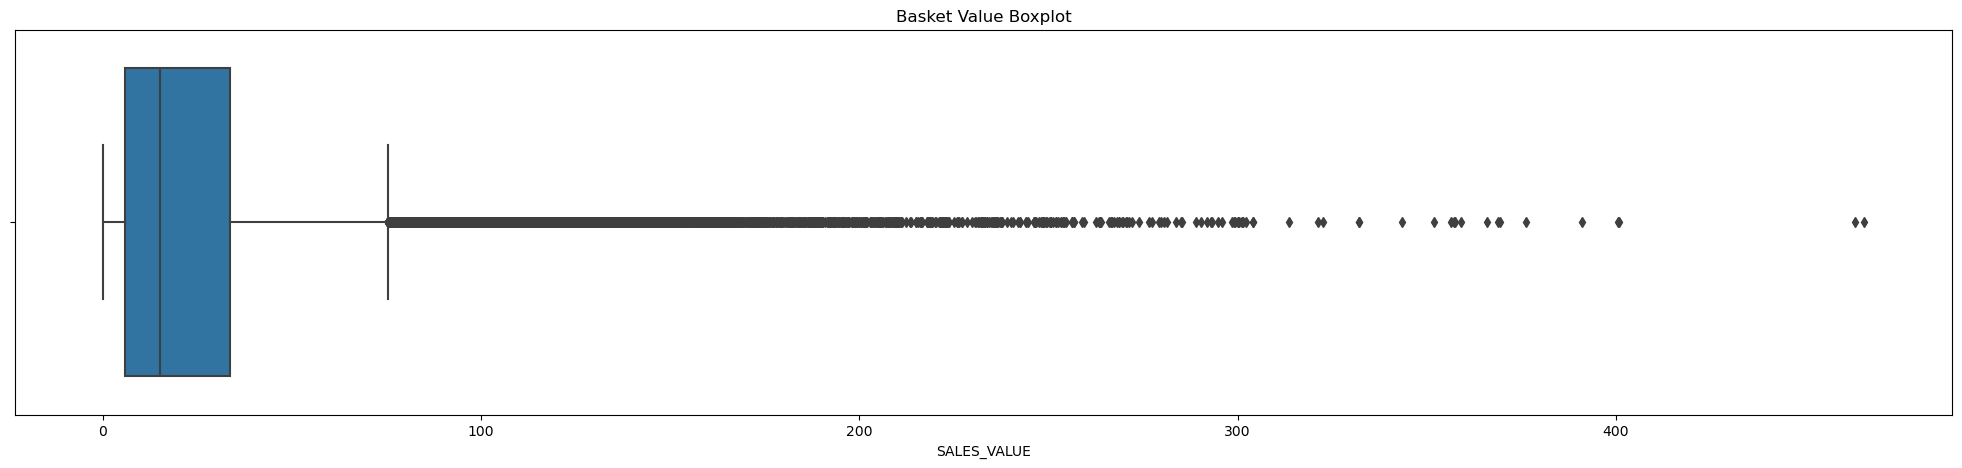

In [94]:
plt.figure(figsize= (25,5))
sns.boxplot(x=tranx_bucket['SALES_VALUE'])
plt.title('Basket Value Boxplot')

In [95]:
tranx_bucket.groupby('use_coupon').aggregate(sales_value_mean = ('SALES_VALUE','mean') ,
                                            coupon_disc_mean = ('COUPON_DISC' , 'mean'),
                                            coupon_match_disc = ('COUPON_MATCH_DISC' , 'mean'),
                                            no_coupon = ('SALES_VALUE','count'))

,sales_value_mean,coupon_disc_mean,coupon_match_disc,no_coupon
use_coupon,,,,
False,25.009980,0.000000,0.000000,47892
True,62.533348,-2.587167,-0.334364,2587


The avg. value without a coupon is $25.

The avg. basket value with coupon is $62.53

The avg. discount generated by coupon is $2.98


#### It shows that person purchases more if coupon is given to them.

In [96]:
tranx_desc = TRANSACTIONS_RAW.merge(right = tranx_bucket , on= 'BASKET_ID' , how = 'left')

In [97]:
tranx_desc = tranx_desc.merge(right = PRODUCT_RAW , on='PRODUCT_ID' , how = 'left')

In [98]:
tranx_desc.head(3)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,use_coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,...,5.91,0,0,False,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.3,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,


In [99]:
tranx_desc.drop(['SALES_VALUE_y' , 'COUPON_DISC_y' , 'COUPON_MATCH_DISC_y'] , axis = 1 , inplace=True)

In [100]:
tranx_desc.head(1)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,DATE,use_coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0,0,2020-01-02,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB


In [101]:
commodity_coupon = tranx_desc.groupby('COMMODITY_DESC').aggregate(total_quantity = ('QUANTITY' , 'count'),use_coupon = ('use_coupon','sum'),coupon = ('COUPON_DISC_x','sum'))

In [102]:
commodity_coupon.head(10)


,total_quantity,use_coupon,coupon
COMMODITY_DESC,,,
,1303,872,-1396
(CORP USE ONLY),12,0,0
ADULT INCONTINENCE,74,3,-1
AIR CARE,928,193,-124
ANALGESICS,681,89,-3
ANTACIDS,307,36,-7
APPAREL,138,11,0
APPLES,2001,287,0
AUDIO/VIDEO PRODUCTS,149,16,-40


In [103]:
commodity_coupon['coupon%']  = round((commodity_coupon['use_coupon']/commodity_coupon['total_quantity'])*100, 2)

In [104]:
commodity_coupon.head()

,total_quantity,use_coupon,coupon,coupon%
COMMODITY_DESC,,,,
,1303,872,-1396,66.92
(CORP USE ONLY),12,0,0,0.00
ADULT INCONTINENCE,74,3,-1,4.05
AIR CARE,928,193,-124,20.80
ANALGESICS,681,89,-3,13.07


In [105]:
commodity_coupon.sort_values('coupon%',ascending=False).head(20)

,total_quantity,use_coupon,coupon,coupon%
COMMODITY_DESC,,,,
NATURAL VITAMINS,1,1,-5,100.00
,1303,872,-1396,66.92
VALENTINE,5,2,0,40.00
BABY FOODS,3664,1114,-38,30.40
RW FRESH PROCESSED MEAT,7,2,0,28.57
DIAPERS & DISPOSABLES,864,231,-215,26.74
BABY HBC,817,181,-82,22.15
AIR CARE,928,193,-124,20.80
FRZN BREAKFAST FOODS,1743,347,-61,19.91


#### While the most prominent product on which coupons are created are haircare and makeup products, coupons are mostly used on drinks, cigerette , diapers,etc . Bathroom products are not even amoung top 10.

In [106]:
TRANSACTIONS_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02


In [107]:
TRANSACTIONS_RAW.groupby(['HOUSEHOLD_KEY','DAY','WEEK_NO']).aggregate({'SALES_VALUE':'sum' ,'RETAIL_DISC': 'sum','COUPON_DISC':'sum',
                                                                      'COUPON_MATCH_DISC':'sum'})

SALES_VALUE  RETAIL_DISC  COUPON_DISC  \
HOUSEHOLD_KEY DAY WEEK_NO                                          
1             51  8              78.66       -16.54           -1   
              67  10             41.10        -8.59            0   
              88  13             26.90        -6.72            0   
              94  14             63.43       -11.08           -2   
              101 15             53.45       -16.42            0   
...                                ...          ...          ...   
2500          145 21             50.23        -2.02           -3   
              150 22             55.03        -2.17            0   
              174 26            110.30       -49.05           -1   
              175 26             10.59         0.00           -2   
              176 26             20.26        -2.51            0   

                           COUPON_MATCH_DISC  
HOUSEHOLD_KEY DAY WEEK_NO                     
1             51  8                        0  
              67  10                       0  
              88  13                       0  
              94  14                      -1  
              101 15                       0  
...                                      ...  
2500          145 21                       0  
              150 22                       0  
              174 26                       0  
              175 26                       0  
              176 26                       0  

[40506 rows x 4 columns]

In [108]:
TRANSACTIONS_RAW.groupby(TRANSACTIONS_RAW['DATE'].dt.year).aggregate({'SALES_VALUE':'sum','RETAIL_DISC':'sum','COUPON_DISC':'sum'})

,SALES_VALUE,RETAIL_DISC,COUPON_DISC
DATE,,,
2020,1359551.73,-248978.11,-6693


#### Sales Value increases as Retail Discount and Coupon Discount increases.

### Dropping  the columns -

In [109]:
CAMPAIGN_DESC_RAW.drop(['START_DAY' , "END_DAY"],axis = 1 , inplace = True)

In [110]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DATE,END_DATE,CAMPAIGN_DURATION,START_MONTH,END_MONTH
0,TypeB,24,2021-10-21,2021-12-20,60,10,12
1,TypeC,15,2021-07-01,2021-12-09,161,7,12
2,TypeB,25,2021-10-21,2021-11-22,32,10,11
3,TypeC,20,2021-09-07,2021-11-16,70,9,11
4,TypeB,23,2021-10-08,2021-11-15,38,10,11


In [111]:
CAMPAIGN_DESC_RAW['START_DATE'] = pd.to_datetime(CAMPAIGN_DESC_RAW['START_DATE']).apply(lambda x : x.date())

In [112]:
CAMPAIGN_DESC_RAW['END_DATE'] = pd.to_datetime(CAMPAIGN_DESC_RAW['END_DATE']).apply(lambda x : x.date())

## the above two steps are done in order to change the data type of the date column so that we can push the data easily back to snowflake.

In [113]:
COUPON_REDEMPT_RAW.drop(['DAY'],axis = 1 , inplace = True)

In [114]:
COUPON_REDEMPT_RAW.dtypes

HOUSEHOLD_KEY             int16
COUPON_UPC                int64
CAMPAIGN                   int8
DATE             datetime64[ns]
dtype: object

In [115]:
COUPON_REDEMPT_RAW['DATE'] = pd.to_datetime(COUPON_REDEMPT_RAW['DATE']).apply(lambda x : x.date())

In [116]:
COUPON_REDEMPT_RAW.dtypes

HOUSEHOLD_KEY     int16
COUPON_UPC        int64
CAMPAIGN           int8
DATE             object
dtype: object

In [117]:
TRANSACTIONS_RAW.drop(['DAY' , 'WEEK_NO'] , axis=1 , inplace=True)

In [118]:
TRANSACTIONS_RAW.dtypes

HOUSEHOLD_KEY                 int16
BASKET_ID                     int64
PRODUCT_ID                    int32
QUANTITY                      int32
SALES_VALUE                 float64
STORE_ID                      int16
RETAIL_DISC                 float64
TRANS_TIME                    int16
COUPON_DISC                    int8
COUPON_MATCH_DISC              int8
DATE                 datetime64[ns]
dtype: object

In [119]:
TRANSACTIONS_RAW['DATE'] = pd.to_datetime(TRANSACTIONS_RAW['DATE']).apply(lambda x : x.date())

In [120]:
TRANSACTIONS_RAW.dtypes

HOUSEHOLD_KEY          int16
BASKET_ID              int64
PRODUCT_ID             int32
QUANTITY               int32
SALES_VALUE          float64
STORE_ID               int16
RETAIL_DISC          float64
TRANS_TIME             int16
COUPON_DISC             int8
COUPON_MATCH_DISC       int8
DATE                  object
dtype: object

### Now Loading Data to DB

In [121]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas
import pandas as pd
import getpass

In [122]:
conn = snowflake.connector.connect(
    user = 'GAURAVMISHRAGM14',
    password = getpass.getpass("Your Snowflake password: \n"),
    account = 'ITBLSIZ-DM68127',
    warehouse = 'GAURAV',
    database = 'RETAIL_PROJECT',
    schema = 'PUBLIC'
)


In [123]:
cur = conn.cursor()

In [124]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DATE,END_DATE,CAMPAIGN_DURATION,START_MONTH,END_MONTH
0,TypeB,24,2021-10-21,2021-12-20,60,10,12
1,TypeC,15,2021-07-01,2021-12-09,161,7,12
2,TypeB,25,2021-10-21,2021-11-22,32,10,11
3,TypeC,20,2021-09-07,2021-11-16,70,9,11
4,TypeB,23,2021-10-08,2021-11-15,38,10,11


In [125]:
cur.execute(
''' create or replace table CAMPAIGN_DESC_NEW(
DESCRIPTION varchar(10),
CAMPAIGN int,
START_DATE date,
END_DATE date,
CAMPAIGN_DURATION int,
START_MONTH int,
END_MONTH int
)''')

In [126]:
success , nchunks , nrows , _ = write_pandas( conn , CAMPAIGN_DESC_RAW , 'CAMPAIGN_DESC_NEW' , quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,30


In [127]:
COUPON_REDEMPT_RAW.head(1)

,HOUSEHOLD_KEY,COUPON_UPC,CAMPAIGN,DATE
0,1,10000085364,8,2021-02-25


In [128]:
cur.execute(
''' create or replace table COUPON_REDEMPT_NEW(
HOUSEHOLD_KEY int,
COUPON_UPC int,
CAMPAIGN int,
DATE date
)''')

In [129]:
success , nchunks , nrows , _ = write_pandas( conn , COUPON_REDEMPT_RAW , 'COUPON_REDEMPT_NEW' , quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,2318


In [130]:
TRANSACTIONS_RAW.head(3)

,HOUSEHOLD_KEY,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,2375,26984851472,1004906,1,1.39,364,-0.6,1631,0,0,2020-01-02
1,2375,26984851472,1033142,1,0.82,364,0.0,1631,0,0,2020-01-02
2,2375,26984851472,1036325,1,0.99,364,-0.3,1631,0,0,2020-01-02


In [131]:
cur.execute(
''' create or replace table TRANSACTIONS_NEW(
HOUSEHOLD_KEY int,
BASKET_ID int,
PRODUCT_ID int,
QUANTITY int,
SALES_VALUE float,
STORE_ID int,
RETAIL_DISC float,
TRANS_TIME int,
COUPON_DISC int,
COUPON_MATCH_DISC int,
DATE date
)''')

In [132]:
success , nchunks , nrows , _ = write_pandas( conn , TRANSACTIONS_RAW , 'TRANSACTIONS_NEW' , quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,450416


In [133]:
cur.close()
conn.close()